In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from IPython.display import display

import itertools
from importlib import reload
plt=reload(plt)

import warnings
warnings.filterwarnings('ignore')

In [6]:
dff = pd.read_csv('C:/Users/91738/Online Retail Recommendation/input/dff.csv')
dff.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,time_intervals,year-month_intervals,Total Price,Money_bins
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,4017,United Kingdom,04:00-07:59,0,15.30,0
1,1,536365,71053,WHITE METAL LANTERN,6,3.39,4017,United Kingdom,04:00-07:59,0,20.34,0
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,4017,United Kingdom,04:00-07:59,0,22.00,0
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,4017,United Kingdom,04:00-07:59,0,20.34,0
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,4017,United Kingdom,04:00-07:59,0,20.34,0


In [11]:
time = list(dff['time_intervals'].unique())

No. of items from UK= 486284
No. of items NOT from UK= 44999


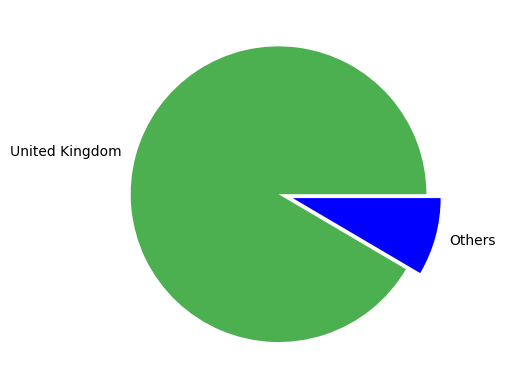

In [7]:
# VISUALISING THE DISTRIBUTION BASED ON COUNTRY

copy_dff = dff.copy()

L = list(copy_dff['Country'])

print("No. of items from UK= "+str(len(copy_dff[ copy_dff['Country']=='United Kingdom'])))
print("No. of items NOT from UK= "+str(len(copy_dff[ copy_dff['Country']!='United Kingdom'])))

country = ["United Kingdom","Others"]
country_wise = []

UK_count = L.count('United Kingdom')
country_wise.append(UK_count)

others = len(L) - UK_count
country_wise.append(others)
explode = (0,0.1)
colors = ["#4CAF50","b"]

plt.pie(country_wise,labels = country,explode = explode,colors = colors)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


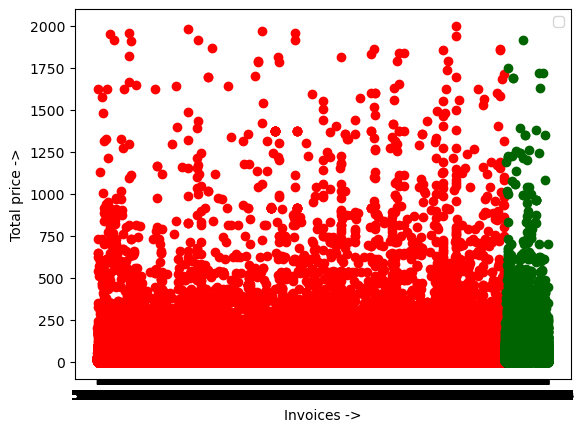

In [8]:
# COUNTRY WISE DISTRIBUTION OF INVOICES

UK_dff = copy_dff[copy_dff["Country"]=='United Kingdom']
Others_dff = copy_dff[copy_dff["Country"]!='United Kingdom']

UK_total_prices = list(UK_dff["Total Price"])
Others_total_prices = list(Others_dff["Total Price"])

A = list(UK_dff["InvoiceNo"])
UK_invoices = []
for i in A:
    UK_invoices.append(str(i))

B = list(Others_dff["InvoiceNo"])
Other_invoices = []
for i in B:
    Other_invoices.append(str(i))

UK_invoices_1 = []
UK_prices_1 = []

for i in range(len(UK_invoices)):
    if UK_total_prices[i] < 2000 and UK_total_prices[i] >0:
        UK_invoices_1.append(UK_invoices[i])
        UK_prices_1.append(UK_total_prices[i])

Other_invoices_1 = []
Other_prices_1 = []

for i in range(len(Other_invoices)):
    if Others_total_prices[i] < 2000 and Others_total_prices[i] >0:
        Other_invoices_1.append(Other_invoices[i])
        Other_prices_1.append(Others_total_prices[i])


plt.scatter(UK_invoices_1,UK_prices_1,color = "r")
plt.scatter(Other_invoices_1,Other_prices_1,color = "darkgreen")
plt.xlabel("Invoices ->")
plt.ylabel("Total price ->")
plt.legend()
plt.show()

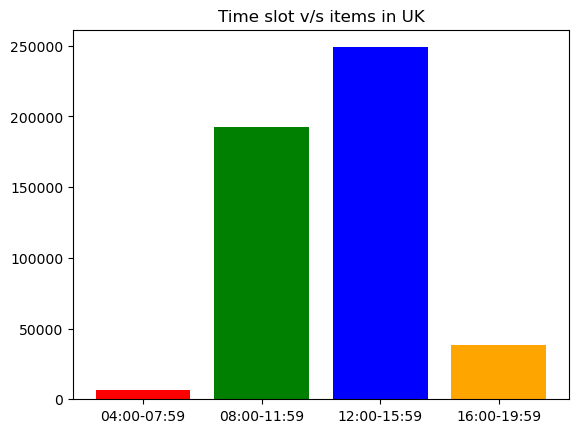

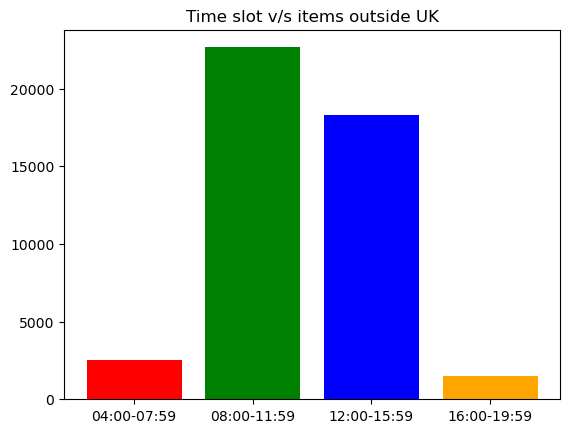

In [12]:
# COUNTRY WISE DISTRIBUTION OF PURCHASES IN DIFFERENT TIME SLOTS

# UK
uk_time_counts = []

for i in time:
    uk_time_counts.append(list(UK_dff["time_intervals"]).count(i))

plt.bar(time,uk_time_counts,color = ["r","g","b","orange"])
plt.title("Time slot v/s items in UK")
plt.show()

# Outside UK
non_uk_time_counts = []
for i in time:
    non_uk_time_counts.append(list(Others_dff["time_intervals"]).count(i))

plt.bar(time,non_uk_time_counts,color = ["r","g","b","orange"])
plt.title("Time slot v/s items outside UK")
plt.show()

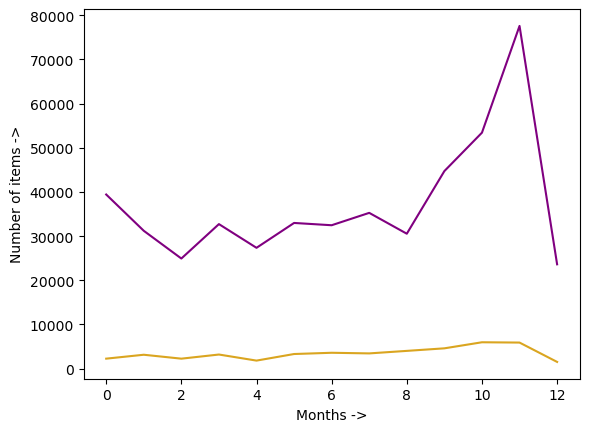

In [13]:
month_wise_uk_distribution = []
month_wise_others_distribution = []
months = []

for i in range(13):
    months.append(i)
    month_data = dff[dff["year-month_intervals"]==i]
    uk_count = len(month_data[month_data["Country"]=="United Kingdom"])
    others_count = len(month_data[month_data["Country"]!="United Kingdom"])

    month_wise_uk_distribution.append(uk_count)
    month_wise_others_distribution.append(others_count)

plt.plot(months, month_wise_uk_distribution, color = "purple")
plt.plot(months, month_wise_others_distribution, color = "goldenrod")
plt.xlabel("Months ->")
plt.ylabel("Number of items ->")
plt.show()